CALISTA NABILA FIRGIAWAN || 202331143 || PM D

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('RiceField.csv') # membaca dataset

In [5]:
print("Informasi Dataset:")
print(data.info())
print("\nStatistik Deskriptif:\n", data.describe()) # memberikan deksripsi statistik

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Production (X)    224 non-null    float64
 1   Harvest Area (Y)  224 non-null    float64
dtypes: float64(2)
memory usage: 3.6 KB
None

Statistik Deskriptif:
        Production (X)  Harvest Area (Y)
count    2.240000e+02        224.000000
mean     1.679701e+06     374349.966920
std      1.161387e+06     232751.161987
min      4.293800e+04      63142.040000
25%      5.488570e+05     146919.500000
50%      1.667773e+06     373551.500000
75%      2.436851e+06     514570.250000
max      4.881089e+06     872737.000000


In [7]:
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values) # mencari nilai yang kosong/hilang


Missing Values:
 Production (X)      0
Harvest Area (Y)    0
dtype: int64


In [9]:
data = data.dropna() # menghapus data yang kosong/hilang

In [11]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1] # memisahkan fitur X dan label y

In [13]:
print("\nBentuk Fitur (X):", X.shape)
print("Bentuk Target (y):", y.shape)


Bentuk Fitur (X): (224, 1)
Bentuk Target (y): (224,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # membagi data uji dan data latih

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # standarisasi

In [19]:
model = BayesianRidge()
model.fit(X_train, y_train) # pembbentukan model

BayesianRidge()

In [29]:
y_pred = model.predict(X_test) # menguji data /memprediksi 

In [46]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nEvaluasi Model Regresi:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}") # mengevaluasi data


Evaluasi Model Regresi:
Mean Absolute Error (MAE): 171727.75
Mean Squared Error (MSE): 41964947629.40
R² Score: -0.03


C:\Users\user\AppData\Local\Temp\ipykernel_16524\2349429863.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2, color='red')


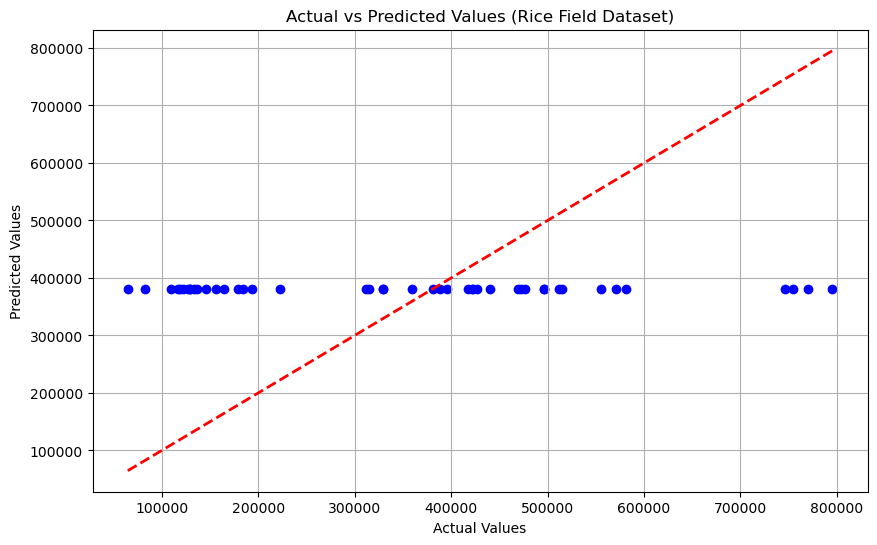

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Rice Field Dataset)')
plt.grid(True)
plt.show() # mevisualisasikan data


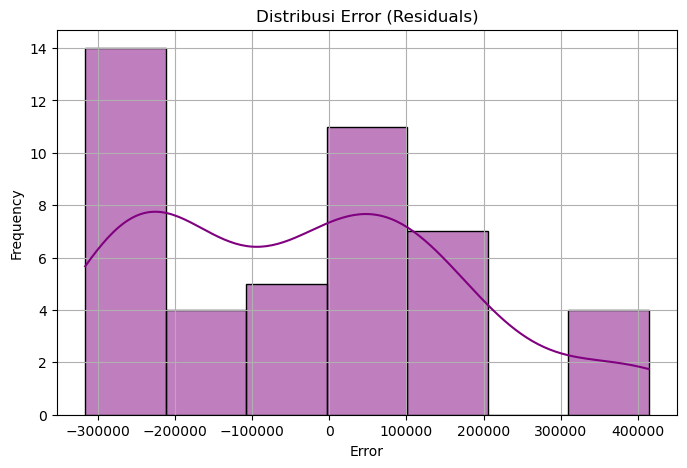

In [41]:
plt.figure(figsize=(8, 5))
sns.histplot(y_test - y_pred, kde=True, color='purple')
plt.title('Distribusi Error (Residuals)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()